<a href="https://colab.research.google.com/github/SaxenaVaishnavi/Machine-Learning-Practices/blob/main/Week_3/Graded_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import VarianceThreshold, RFE, SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [5]:
# Replace '?' or other non-numeric placeholders with NaN
dataset.replace('?', np.nan, inplace=True)

# Problem 1
How many features remain after applying following pipeline to the feature matrix?
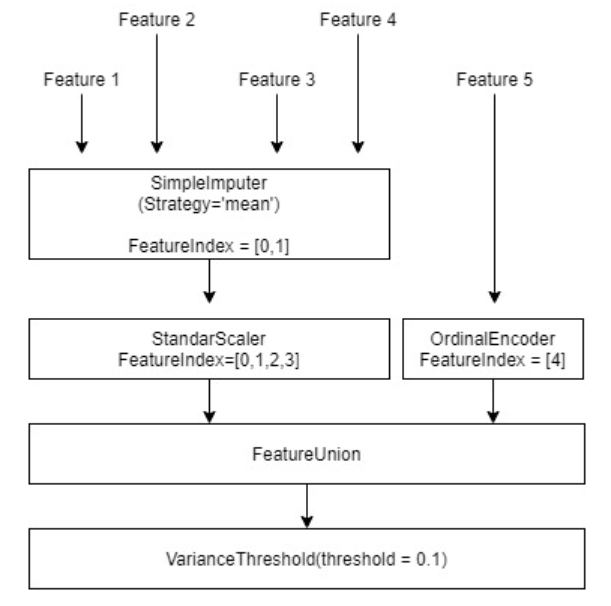

In [19]:
num_features = ['V1', 'V2', 'V3', 'V4']
cat_features = ['V5']

# FunctionTransformer to select specific columns
def select_numeric_features(X):
    return X[num_features]

def select_categorical_features(X):
    return X[cat_features]

# ------------------- Step 1: Define Pipelines -------------------
# Numerical pipeline: Imputation (mean) + Scale
num_pipeline = Pipeline([
    ('selector', FunctionTransformer(select_numeric_features, validate=False)),  # Select numeric columns
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline: Imputation (most frequent) + Encoding
cat_pipeline = Pipeline([
    ('selector', FunctionTransformer(select_categorical_features, validate=False)),  # Select categorical columns
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# ------------------- Step 2: Apply FeatureUnion -------------------
# FeatureUnion:  Combine both pipelines
full_pipeline = FeatureUnion([
    ('num', num_pipeline),
    ('cat', cat_pipeline)
])

processed_dataset = full_pipeline.fit_transform(dataset)

# ------------------- Step 3: Apply VarianceThreshold -------------------
var_thresh = VarianceThreshold(threshold=0.1)
processed_dataset_reduced = var_thresh.fit_transform(processed_dataset)

print(f"Number of features after VarianceThreshold: {processed_dataset_reduced.shape[1]}")

Number of features after VarianceThreshold: 4


# Problem 2
What are the two most important features computed by RFE?

Preprocess the data using pipeline shown in the diagram. Use LogisticRegression (with default parameters) for the estimator. Encode target variable via ordinal encoding.

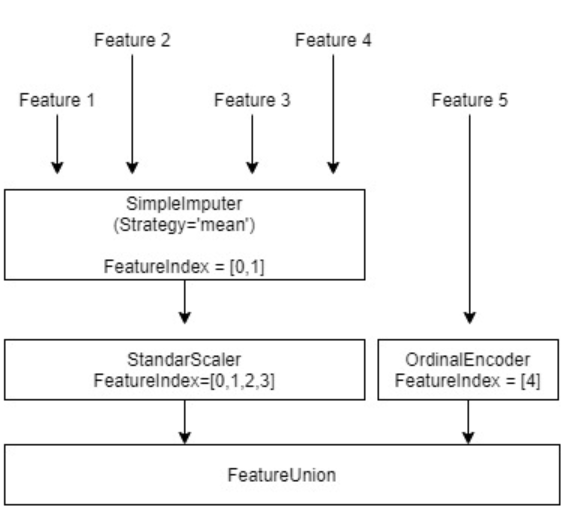

In [27]:
y = dataset['Target']

# Use Logistic Regression as the estimator
log_reg = LogisticRegression()

# Apply RFE to select the two most important features
rfe = RFE(estimator=log_reg, n_features_to_select=2)
rfe.fit(processed_dataset, y)

# Get selected feature indices
selected_features_rfe = np.where(rfe.support_)[0]

# Print selected feature names
selected_feature_names_rfe = [num_features[i] for i in selected_features_rfe]
print(f"Two most important features: {selected_feature_names_rfe}")

Two most important features: ['V1', 'V3']


# Problem 3
What are the indices of two most important features computed by SFS (forward)?

Preprocess the data using pipeline shown in the diagram above. Use LogisticRegression (with  default parameters) for the estimator. Encode target variable via ordinal encoding.

In [30]:
# Use Logistic Regression as the estimator
log_reg = LogisticRegression()

# Apply Sequential Feature Selector (SFS) (forward selection) to select 2 features
sfs = SequentialFeatureSelector(log_reg, n_features_to_select=2, direction='forward')
sfs.fit(processed_dataset, y)

# Get selected feature indices
selected_features_sfs = np.where(sfs.support_)[0]

# Print selected feature names
selected_feature_names_sfs = [num_features[i] for i in selected_features_sfs]
print(f"Two most important features using SFS (forward): {selected_feature_names_sfs}")

Two most important features using SFS (forward): ['V2', 'V4']


# Problem 4
What are the indices of two most important features computed by SFS (backward)?

In [31]:
# Use Logistic Regression as the estimator
log_reg = LogisticRegression()

# Apply Sequential Feature Selector (SFS) (forward selection) to select 2 features
sfs = SequentialFeatureSelector(log_reg, n_features_to_select=2, direction='backward')
sfs.fit(processed_dataset, y)

# Get selected feature indices
selected_features_sfs_back = np.where(sfs.support_)[0]

# Print selected feature names
selected_feature_names_sfs_back = [num_features[i] for i in selected_features_sfs_back]
print(f"Two most important features using SFS (forward): {selected_feature_names_sfs_back}")

Two most important features using SFS (forward): ['V3', 'V4']
